This notebook is the first step in data exploration by importing appropriate files and dataframes. These dataframes were analyzed by assessing linear regressions and visualizations, which are stored in separate notebooks. 

The Baseball_Data_Exploration analyzes the question: How can salaries of baseball players be predicted based on their game performance and popularity 

1. The objective of the research is targeted for youth baseball players who choose to evaluate themselves based on categories that will estimate their salary. 

2. The second objective is for team managers to have a better understanding of their players' salaries to prevent overpaying or underpaying. 

3. The last objective is for baseball players to have a better understanding of their individual records to decide if they would like to move or stay in their team. 

Below codes show the process of data exploration to analyze which varaible or column has the most significant influence on players' salaries. 

In [89]:
from google.colab import files
uploaded = files.upload() 

# a code to import a file from the computer 

Saving Batting.csv to Batting (1).csv


In [90]:
import pandas as pd
import io

# a code to import PANDAS, or python data analysis library into Google Colaboratory 

dfbat = pd.read_csv(io.BytesIO(uploaded['Batting.csv']))
print(dfbat.tail())

# a code to name the uploaded file 'Batting.csv' as 'dfbat' and print the last few lines of the file 

         playerID  yearID  stint teamID lgID    G     AB     R     H    2B  \
101327   zitoba01    2015      1    OAK   AL    3    0.0   0.0   0.0   0.0   
101328  zobribe01    2015      1    OAK   AL   67  235.0  39.0  63.0  20.0   
101329  zobribe01    2015      2    KCA   AL   59  232.0  37.0  66.0  16.0   
101330  zuninmi01    2015      1    SEA   AL  112  350.0  28.0  61.0  11.0   
101331   zychto01    2015      1    SEA   AL   13    0.0   0.0   0.0   0.0   

        ...   RBI   SB   CS    BB     SO  IBB  HBP   SH   SF  GIDP  
101327  ...   0.0  0.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0   0.0  
101328  ...  33.0  1.0  1.0  33.0   26.0  2.0  0.0  0.0  3.0   5.0  
101329  ...  23.0  2.0  3.0  29.0   30.0  1.0  1.0  0.0  2.0   3.0  
101330  ...  28.0  0.0  1.0  21.0  132.0  0.0  5.0  8.0  2.0   6.0  
101331  ...   0.0  0.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0   0.0  

[5 rows x 22 columns]


In [105]:
dfmaxbat = dfbat.groupby(['yearID', 'teamID']).max()
print(dfmaxbat)

# a code to group the dataframe by 'yearID' and 'teamID' to take the maximum values from the dataframe
# maximum function was used because higher RBI means that the player made more points in the game 
# the dataframe was grouped by yearid and teamID to later reference which player from which team scored a high RBI 
# the newly grouped dataframe is called 'dfmaxbat', which is ordered to be printed 

                playerID  stint lgID    G     AB      R      H    2B    3B  \
yearID teamID                                                                
1871   BS1     wrighha01      1  NaN   31  157.0   66.0   66.0  10.0   9.0   
       CH1     zettlge01      1  NaN   28  135.0   45.0   51.0  10.0   6.0   
       CL1     whiteel01      1  NaN   29  146.0   40.0   47.0   8.0  10.0   
       FW1     selmafr01      1  NaN   19   89.0   21.0   31.0   3.0   3.0   
       NY2     woltery01      1  NaN   33  168.0   41.0   58.0   7.0   9.0   
...                  ...    ...  ...  ...    ...    ...    ...   ...   ...   
2015   SLN      wongko01      2   NL  155  579.0  101.0  160.0  44.0   7.0   
       TBA     yateski01      2   AL  160  604.0   74.0  163.0  35.0  12.0   
       TEX     wilsobo02      2   AL  160  613.0   94.0  187.0  34.0  10.0   
       TOR     valenda01      2   AL  159  620.0  122.0  184.0  41.0   4.0   
       WAS     zimmery01      2   NL  156  583.0  118.0  172.0  

In [4]:
df_newbat = dfmaxbat.loc[:, ['RBI', 'playerID']]
print(df_newbat)

# a location function is applied on the already existing dataframe called 'dfmaxbat' to locate 'RBI', which is a batting data, and 'playerID', and print 

                 RBI   playerID
yearID teamID                  
1871   BS1      43.0  wrighha01
       CH1      33.0  zettlge01
       CL1      23.0  whiteel01
       FW1      18.0  selmafr01
       NY2      44.0  woltery01
...              ...        ...
2015   SLN      84.0   wongko01
       TBA      73.0  yateski01
       TEX      98.0  wilsobo02
       TOR     123.0  valenda01
       WAS      99.0  zimmery01

[2805 rows x 2 columns]


In [5]:
(df_newbat.loc[:, ['RBI']].values < 0).any()

# use the location function written in the previous line to perform a sanity check on whether the dataframe contains any 'RBI' values that are negative because RBI values cannot possibly be negative 

False

In [6]:
df_newbat.describe() 

# the describe function is applied on the dataframe called 'df_newbat' to call the column that was addressed inside the location function, which in this case is 'RBI' 

,RBI
count,2791.000000
mean,94.268721
std,25.556028
min,0.000000
25%,79.000000
50%,95.000000
75%,110.000000
max,191.000000


In [7]:
df_newbat.loc[(df_newbat.values == 191), ["playerID"]]  

# Since the maximum RBI data point is displayed in the previous line, this line looks for the player with the most RBI in a single season
# A location function is applied on 'df_newbat' to look for RBI value that is equal to 191 

,,playerID
yearID,teamID,
1930,CHN,wilsoha01


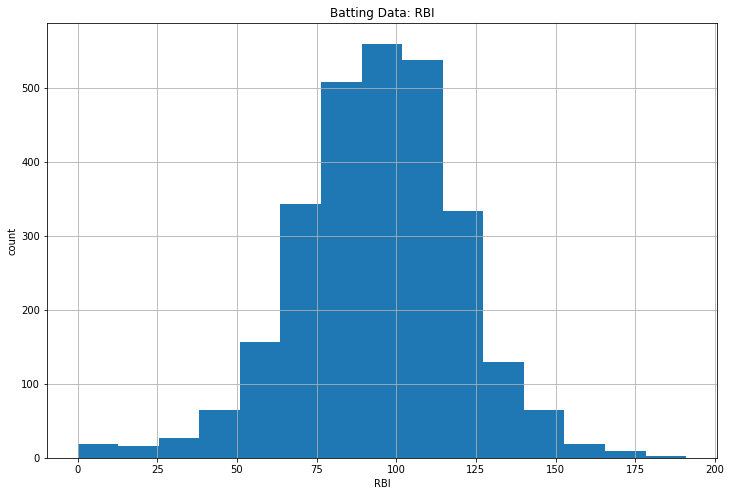

In [91]:
import matplotlib.pyplot as plt

# matplotlib.pyplot is imported as plt to be continuously used to graph histograms based on the dataframe created 

df_newbat.hist(figsize=[12, 8], bins=15)
plt.title('Batting Data: RBI')
plt.xlabel('RBI')
plt.ylabel('count')
plt.show()

# this code creates a histogram from the dataframe 'df_newbat' and name the title, xlabel, and ylabel with appropriate data identifications

#This graph shows the hitters’ RBI records. 
#The maximum RBI is close to 190 and the minimum RBI is 0 in a single season based on the histogram. 
#The average RBI for players seems to be about 80 to 90, which is a reasonable amount. 

In [106]:
uploaded = files.upload()

# a code to import a file from the computer

Saving Pitching.csv to Pitching (2).csv


In [10]:
dfpitch = pd.read_csv(io.BytesIO(uploaded['Pitching.csv']))
print(dfpitch.tail())

# a code to name the uploaded file 'Pitching.csv' as 'dfpitch' and print the last few lines of the file 

        playerID  yearID  stint teamID lgID   W   L   G  GS  CG  ...  IBB  \
44134  youngch03    2015      1    KCA   AL  11   6  34  18   0  ...  0.0   
44135  zieglbr01    2015      1    ARI   NL   0   3  66   0   0  ...  3.0   
44136  zimmejo02    2015      1    WAS   NL  13  10  33  33   0  ...  3.0   
44137   zitoba01    2015      1    OAK   AL   0   0   3   2   0  ...  0.0   
44138   zychto01    2015      1    SEA   AL   0   0  13   1   0  ...  0.0   

        WP  HBP  BK    BFP    GF   R   SH   SF  GIDP  
44134  5.0  0.0   0  500.0   3.0  44  4.0  2.0   NaN  
44135  2.0  1.0   0  263.0  46.0  17  1.0  0.0   NaN  
44136  2.0  8.0   1  831.0   0.0  89  8.0  2.0   NaN  
44137  0.0  0.0   0   37.0   1.0   8  0.0  0.0   NaN  
44138  1.0  2.0   0   76.0   4.0   6  0.0  0.0   NaN  

[5 rows x 30 columns]


In [11]:
dfminpitch = dfpitch.groupby(['yearID', 'teamID']).min()
print(dfminpitch)

# a code to group the dataframe by 'yearID' and 'teamID' to take the minimum values from the dataframe
# minimum value was taken from the ERA data because low ERA means that the pitcher is a good pitcher 
# the newly grouped dataframe is called 'dfminpitch', which is ordered to be printed

                playerID  stint lgID  W   L   G  GS  CG  SHO  SV  ...  IBB  \
yearID teamID                                                     ...        
1871   BS1     spaldal01      1  NaN  1   0   9   0   0    0   0  ...  NaN   
       CH1     pinkhed01      1  NaN  1   0   3   0   0    0   0  ...  NaN   
       CL1     paborch01      1  NaN  0   2   7   1   1    0   0  ...  NaN   
       FW1     mathebo01      1  NaN  6  11  19  19  19    1   0  ...  NaN   
       NY2     fergubo01      1  NaN  0   0   1   0   0    0   0  ...  NaN   
...                  ...    ...  ... ..  ..  ..  ..  ..  ...  ..  ...  ...   
2015   SLN     belisma01      1   NL  0   0   1   0   0    0   0  ...  0.0   
       TBA     andrima01      1   AL  0   0   1   0   0    0   0  ...  0.0   
       TEX      bassan01      1   AL  0   0   2   0   0    0   0  ...  0.0   
       TOR     alberan01      1   AL  0   0   1   0   0    0   0  ...  0.0   
       WAS     barreaa01      1   NL  0   0   1   0   0    0   0

In [12]:
df_newpitch = dfminpitch.loc[:, ['ERA', 'playerID']]
print(df_newpitch)

# a location function is applied on the already existing dataframe called 'dfmaxbat' to locate 'ERA', which is a pitching data, and 'playerID', and print 

                ERA   playerID
yearID teamID                 
1871   BS1     3.36  spaldal01
       CH1     2.73  pinkhed01
       CL1     3.77  paborch01
       FW1     5.17  mathebo01
       NY2     3.43  fergubo01
...             ...        ...
2015   SLN     0.00  belisma01
       TBA     0.00  andrima01
       TEX     1.15   bassan01
       TOR     0.00  alberan01
       WAS     0.00  barreaa01

[2805 rows x 2 columns]


In [13]:
(df_newpitch.loc[:, ['ERA']].values < 0).any()

# use the location function written in the previous line to perform a sanity check on whether the dataframe contains any 'ERA' values that are negative because ERA values cannot possibly be negative 

False

In [14]:
df_newpitch.describe() 

# the describe function is applied on the dataframe called 'df_newpitch' to call the column that was addressed inside the location function, which in this case is 'ERA' 

,ERA
count,2805.000000
mean,1.498075
std,1.230182
min,0.000000
25%,0.000000
50%,1.690000
75%,2.440000
max,6.910000


In [15]:
df_newpitch.loc[(df_newpitch.values == 0), ["playerID"]] 

# Since the minimum ERA data point is displayed in the previous line, this line looks for the player with the least ERA in a single season
# A location function is applied on 'df_newpitch' to look for ERA value that is equal to 0 

playerID
yearID teamID           
1871   TRO     flowedi01
1873   ELI     campbhu01
1875   BR2     arundha01
1876   BSN     bordejo01
       CHN     barnero01
...                  ...
2015   SFN     affelje01
       SLN     belisma01
       TBA     andrima01
       TOR     alberan01
       WAS     barreaa01

[906 rows x 1 columns]

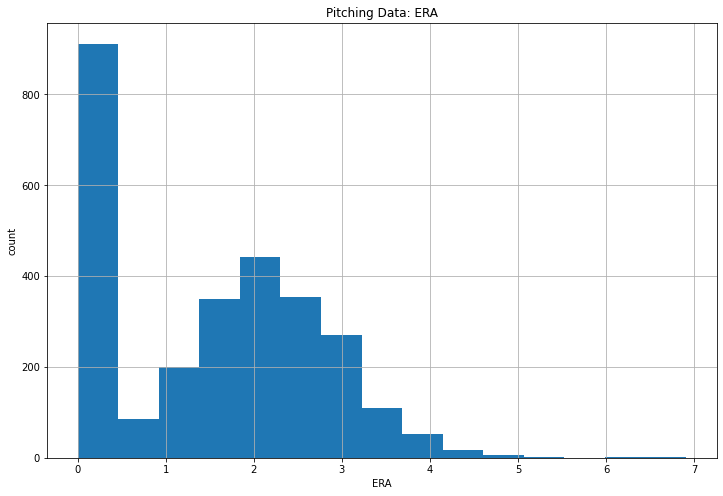

In [16]:
df_newpitch.hist(figsize=[12, 8], bins=15)
plt.title('Pitching Data: ERA')
plt.xlabel('ERA')
plt.ylabel('count')
plt.show()

# this code creates a histogram from the dataframe 'df_newpitch' and name the title, xlabel, and ylabel with appropriate data identifications

# This graph shows the pitchers’ ERA. 
# Since the x-axis of the histogram is ranging from 0 to 7, the dataset is verified because ERA is a data that stays around about 2 to 3 as shown. 
# The minimum value of ERA in a single season was 0.00, while the maximum value was around 7.00. 

In [93]:
uploaded = files.upload()

# a code to import a file from the computer

Saving Teams.csv to Teams (1).csv


In [18]:
dfteams = pd.read_csv(io.BytesIO(uploaded['Teams.csv']))
print(dfteams.head())

# a code to name the uploaded file 'Teams.csv' as 'dfteams' and print the last few lines of the file 

   yearID lgID teamID franchID divID  Rank   G  Ghome   W   L  ...  DP    FP  \
0    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10  ... NaN  0.83   
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9  ... NaN  0.82   
2    1871  NaN    CL1      CFC   NaN     8  29    NaN  10  19  ... NaN  0.81   
3    1871  NaN    FW1      KEK   NaN     7  19    NaN   7  12  ... NaN  0.80   
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17  ... NaN  0.83   

                      name                          park  attendance  BPF  \
0     Boston Red Stockings           South End Grounds I         NaN  103   
1  Chicago White Stockings       Union Base-Ball Grounds         NaN  104   
2   Cleveland Forest Citys  National Association Grounds         NaN   96   
3     Fort Wayne Kekiongas                Hamilton Field         NaN  101   
4         New York Mutuals      Union Grounds (Brooklyn)         NaN   90   

   PPF  teamIDBR  teamIDlahman45  teamIDretro  
0   98  

In [19]:
dfmaxteams = dfteams.groupby(['yearID', 'teamID']).max()
print(dfmaxteams)

# a code to group the dataframe by 'yearID' and 'teamID' to take the maximum values from the dataframe
# the newly grouped dataframe is called 'dfmaxteams', which is ordered to be printed

              lgID franchID divID  Rank    G  Ghome    W   L DivWin WCWin  \
yearID teamID                                                               
1871   BS1     NaN      BNA   NaN     3   31    NaN   20  10    NaN   NaN   
       CH1     NaN      CNA   NaN     2   28    NaN   19   9    NaN   NaN   
       CL1     NaN      CFC   NaN     8   29    NaN   10  19    NaN   NaN   
       FW1     NaN      KEK   NaN     7   19    NaN    7  12    NaN   NaN   
       NY2     NaN      NNA   NaN     5   33    NaN   16  17    NaN   NaN   
...            ...      ...   ...   ...  ...    ...  ...  ..    ...   ...   
2015   SLN      NL      STL     C     1  162   81.0  100  62      Y     N   
       TBA      AL      TBD     E     4  162   84.0   80  82      N     N   
       TEX      AL      TEX     W     1  162   81.0   88  74      Y     N   
       TOR      AL      TOR     E     1  162   81.0   93  69      Y     N   
       WAS      NL      WSN     E     2  162   81.0   83  79      N     N   

In [20]:
df_newteams = dfmaxteams.loc[:, ['W', 'name']]
print(df_newteams)

# a location function is applied on the already existing dataframe called 'df_newteams' to locate 'W', which is a team winning data, and 'name', and print 

                 W                     name
yearID teamID                              
1871   BS1      20     Boston Red Stockings
       CH1      19  Chicago White Stockings
       CL1      10   Cleveland Forest Citys
       FW1       7     Fort Wayne Kekiongas
       NY2      16         New York Mutuals
...            ...                      ...
2015   SLN     100      St. Louis Cardinals
       TBA      80           Tampa Bay Rays
       TEX      88            Texas Rangers
       TOR      93        Toronto Blue Jays
       WAS      83     Washington Nationals

[2805 rows x 2 columns]


In [21]:
(df_newteams.loc[:, ['W']].values < 0).any()

# use the location function written in the previous line to perform a sanity check on whether the dataframe contains any 'W' values that are negative because RBI values cannot possibly be negative 

False

In [22]:
df_newteams.describe()

# the describe function is applied on the dataframe called 'df_newteams' to call the column that was addressed inside the location function, which in this case is 'W' 

,W
count,2805.000000
mean,74.749020
std,17.640402
min,0.000000
25%,66.000000
50%,77.000000
75%,87.000000
max,116.000000


In [23]:
df_newteams.loc[(df_newteams.values == 116), ["W"]] 

# Since the maximum W data point is displayed in the previous line, this line looks for the teams with the most win in a single season
# A location function is applied on 'df_newteams' to look for W value that is equal to 116 

,,W
yearID,teamID,
1906,CHN,116
2001,SEA,116


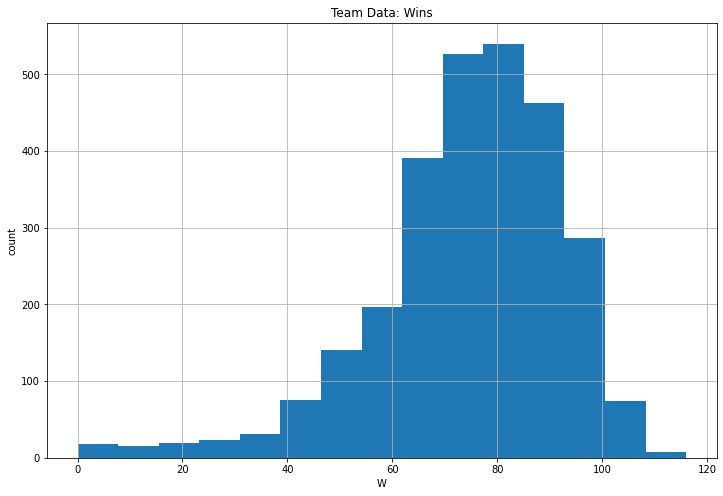

In [24]:
df_newteams.hist(figsize=[12, 8], bins=15)
plt.title('Team Data: Wins')
plt.xlabel('W')
plt.ylabel('count')
plt.show()

# this code creates a histogram from the dataframe 'df_newteams' and name the title, xlabel, and ylabel with appropriate data identifications 

# The graph shows the number of wins of all baseball teams in a single season with a maximum of around 118 wins and at least 0 wins. 
# Since there are about 160 games in a single baseball season, the maximum number of wins seems to be fair considering that the winning percentage was about 72.8%. 
# The average number of wins sticks around 70 to 80 wins, which is again reasonable because the mean winning percentage should be around 50%. 

In [94]:
uploaded = files.upload()

# a code to import a file from the computer 

Saving Salaries.csv to Salaries (1).csv


In [26]:
dfsal = pd.read_csv(io.BytesIO(uploaded['Salaries.csv']))
print(dfsal.head())

# a code to name the uploaded file 'Salaries.csv' as 'dfsal' and print the last few lines of the file 

   yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000


In [27]:
dfsal = dfsal.groupby(['teamID', 'yearID']).mean()
print(dfsal)

# a code to group the dataframe by 'yearID' and 'teamID' to take the mean values from the dataframe 
# the newly grouped dataframe is called 'dfsal', which is ordered to be printed 

                     salary
teamID yearID              
ANA    1997    1.004370e+06
       1998    1.214147e+06
       1999    1.384704e+06
       2000    1.715472e+06
       2001    1.584506e+06
...                     ...
WAS    2011    2.201963e+06
       2012    2.695171e+06
       2013    4.548131e+06
       2014    4.399456e+06
       2015    5.365085e+06

[888 rows x 1 columns]


In [28]:
df_newsal = dfsal.loc[:, ['salary']]
print(df_newsal)

# a location function is applied on the already existing dataframe called 'df_newsal' to locate 'salary', which is a players financial data, and print 

                     salary
teamID yearID              
ANA    1997    1.004370e+06
       1998    1.214147e+06
       1999    1.384704e+06
       2000    1.715472e+06
       2001    1.584506e+06
...                     ...
WAS    2011    2.201963e+06
       2012    2.695171e+06
       2013    4.548131e+06
       2014    4.399456e+06
       2015    5.365085e+06

[888 rows x 1 columns]


In [29]:
df_newsal.describe() 

# the describe function is applied on the dataframe called 'df_newsal' to call the column that was addressed inside the location function, which in this case is 'salary' 

,salary
count,8.880000e+02
mean,2.043753e+06
std,1.512310e+06
min,2.200000e+05
25%,7.936055e+05
50%,1.630190e+06
75%,2.965852e+06
max,8.253336e+06


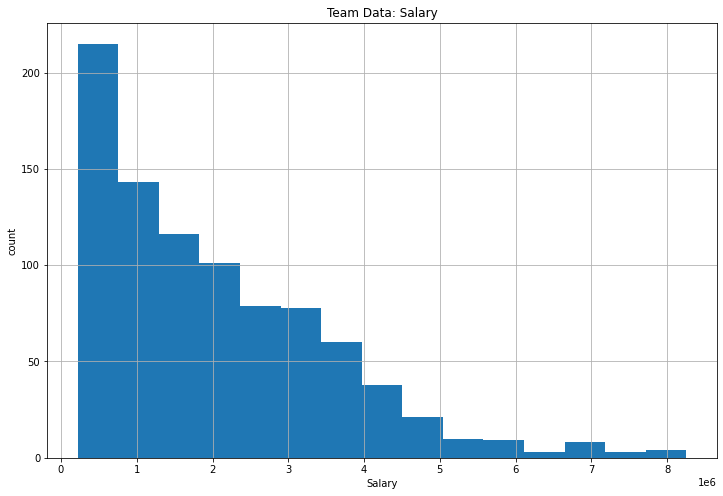

In [107]:
df_newsal.hist(figsize=[12, 8], bins=15)
plt.title('Team Data: Salary')
plt.xlabel('Salary')
plt.ylabel('count')
plt.show() 

# The graphs shows the average salary of baseball teams' they invest on their players. 
# Less concentration in this graph because starplayers are spread out in different teams to represent that team as a franchise. 
# Teams in 7~8 range has high average salary, but this does not necessarily mean that the total salary is high because there is a possibility that the number of players 

In [31]:
df_indiv_salary = pd.read_csv(io.BytesIO(uploaded['Salaries.csv']))
print(df_indiv_salary.head())

# a code to name the uploaded file 'Salaries.csv' as 'df_indiv_salary' and print the last few lines of the file
# This is a continuation from the last data search on baseball teams' average salary to compare the data with players' average salary 

   yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000


In [32]:
df_indiv_salary_avg = df_indiv_salary.groupby(['playerID', 'yearID']).mean()
print(df_indiv_salary_avg)

# a code to group the dataframe by 'yearID' and 'teamID' to take the mean values from the dataframe
# the newly grouped dataframe is called 'df_indiv_salary_avg', which is ordered to be printed

                     salary
playerID  yearID           
aardsda01 2004     300000.0
          2007     387500.0
          2008     403250.0
          2009     419000.0
          2010    2750000.0
...                     ...
zuninmi01 2015     523500.0
zupcibo01 1991     100000.0
          1992     109000.0
          1993     222000.0
zuvelpa01 1989     145000.0

[25471 rows x 1 columns]


In [33]:
print(df_indiv_salary.mean()) 

# a code to print the average value of 'df_indiv_salary' 
# teams' average salary was higher than players' average salary 
# potentially because players' with low salary are less accounted 
# in teams' average salary.
# From this, we can infer that players' with low salary 
# are in teams with lots of players.
# Similarly, players with high salary are accounted more in 
# teams' average salary, which means that they are in teams 
# with low number of players. 
# These assumptions make sense because teams with less players
# would want starplayers, while larger teams can accomodate 
# a wide range of players. 

yearID    2.000374e+03
salary    2.008563e+06
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [95]:
uploaded = files.upload()

# a code to import a file from the computer

Saving TeamsHalf.csv to TeamsHalf (1).csv


In [35]:
dfhalf = pd.read_csv(io.BytesIO(uploaded['TeamsHalf.csv']))
print(dfhalf.head())

# a code to name the uploaded file 'TeamsHalf.csv' as 'dfhalf' and print the last few lines of the file 

   yearID lgID teamID  Half divID DivWin  Rank   G   W   L
0    1981   NL    ATL     1     W      N     4  54  25  29
1    1981   NL    ATL     2     W      N     5  52  25  27
2    1981   AL    BAL     1     E      N     2  54  31  23
3    1981   AL    BAL     2     E      N     4  51  28  23
4    1981   AL    BOS     1     E      N     5  56  30  26


In [36]:
dfmaxhalf = dfhalf.groupby(['yearID', 'teamID']).max()
print(dfmaxhalf)

# a code to group the dataframe by 'yearID' and 'teamID' to take the maximum values from the dataframe
# the newly grouped dataframe is called 'dfmaxhalf', which is ordered to be printed

              lgID  Half divID DivWin  Rank   G   W   L
yearID teamID                                          
1981   ATL      NL     2     W      N     5  54  25  29
       BAL      AL     2     E      N     4  54  31  23
       BOS      AL     2     E      N     5  56  30  26
       CAL      AL     2     W      N     6  60  31  30
       CHA      AL     2     W      N     6  53  31  30
       CHN      NL     2     E      N     6  52  23  37
       CIN      NL     2     W      N     2  56  35  21
       CLE      AL     2     E      N     6  53  26  27
       DET      AL     2     E      N     4  57  31  26
       HOU      NL     2     W      N     3  57  33  29
       KCA      AL     2     W      N     5  53  30  30
       LAN      NL     2     W      N     4  57  36  26
       MIN      AL     2     W      N     7  56  24  39
       ML4      AL     2     E      N     3  56  31  25
       MON      NL     2     E      N     3  55  30  25
       NYA      AL     2     E      N     5  56 

In [37]:
df_newhalf = dfmaxhalf.loc[:, ['W']]
print(df_newhalf)

# a location function is applied on the already existing dataframe called 'df_newhalf' to locate 'W', which is a team data, and print 

                W
yearID teamID    
1981   ATL     25
       BAL     31
       BOS     30
       CAL     31
       CHA     31
       CHN     23
       CIN     35
       CLE     26
       DET     31
       HOU     33
       KCA     30
       LAN     36
       MIN     24
       ML4     31
       MON     30
       NYA     34
       NYN     24
       OAK     37
       PHI     34
       PIT     25
       SDN     23
       SEA     23
       SFN     29
       SLN     30
       TEX     33
       TOR     21


In [38]:
df_newhalf.describe()

# the describe function is applied on the dataframe called 'df_newhalf' to call the column that was addressed inside the location function, which in this case is 'W' 

,W
count,26.000000
mean,29.230769
std,4.545835
min,21.000000
25%,25.000000
50%,30.000000
75%,32.500000
max,37.000000


In [39]:
df_newhalf.loc[(df_newhalf.values == 37), ["W"]] 

# Since the maximum winning data point is displayed in the previous line, this line looks for the team with the most wins in a single season
# A location function is applied on 'df_newhalf' to look for W value that is equal to 37 

,,W
yearID,teamID,
1981,OAK,37


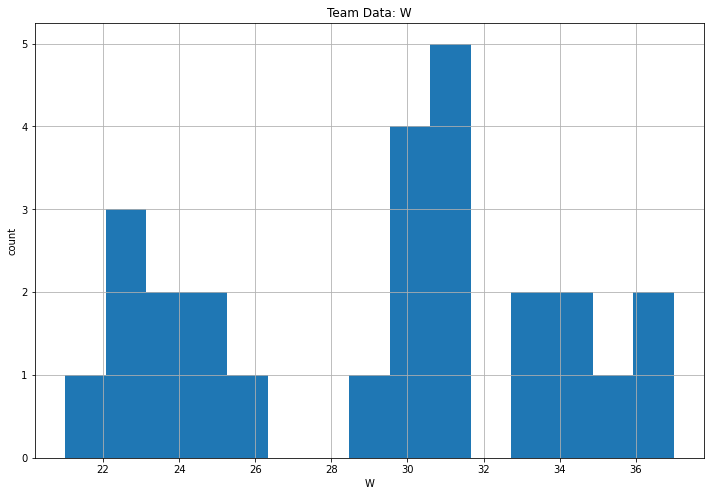

In [40]:
df_newhalf.hist(figsize=[12, 8], bins=15)
plt.title('Team Data: W')
plt.xlabel('W')
plt.ylabel('count')
plt.show()

# this code creates a histogram from the dataframe 'df_newhalf' and name the title, xlabel, and ylabel with appropriate data identifications 

# The graph shows the number of half wins of different baseball seasons. 
# The graph is fairly distributed because half of a season is less games for teams to increase or decrease the gap between teams. 

In [96]:
uploaded = files.upload()

# a code to import a file from the computer 

Saving HallOfFame.csv to HallOfFame (1).csv


In [42]:
dfHOF = pd.read_csv(io.BytesIO(uploaded['HallOfFame.csv']))
print(dfHOF.head())

# a code to name the uploaded file 'HallOfFame.csv' as 'dfHOF' and print the first few lines of the file 

    playerID  yearid votedBy  ballots  needed  votes inducted category  \
0   cobbty01    1936   BBWAA    226.0   170.0  222.0        Y   Player   
1   ruthba01    1936   BBWAA    226.0   170.0  215.0        Y   Player   
2  wagneho01    1936   BBWAA    226.0   170.0  215.0        Y   Player   
3  mathech01    1936   BBWAA    226.0   170.0  205.0        Y   Player   
4  johnswa01    1936   BBWAA    226.0   170.0  189.0        Y   Player   

  needed_note  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [43]:
dfmaxHOF = dfHOF.groupby(['playerID', 'yearid']).max()
print(dfmaxHOF)

# a code to group the dataframe by 'yearID' and 'teamID' to take the maximum values from the dataframe 
# the newly grouped dataframe is called 'dfmaxHOF', which is ordered to be printed 

                 votedBy  ballots  needed  votes inducted category
playerID  yearid                                                  
aaronha01 1982     BBWAA    415.0   312.0  406.0        Y   Player
abbotji01 2005     BBWAA    516.0   387.0   13.0        N   Player
adamsba01 1937     BBWAA    201.0   151.0    8.0        N   Player
          1938     BBWAA    262.0   197.0   11.0        N   Player
          1939     BBWAA    274.0   206.0   11.0        N   Player
...                  ...      ...     ...    ...      ...      ...
zachrpa01 1991     BBWAA    443.0   333.0    0.0        N   Player
zahnge01  1991     BBWAA    443.0   333.0    0.0        N   Player
zeileto01 2010     BBWAA    539.0   405.0    0.0        N   Player
zimmech01 1938     BBWAA    262.0   197.0    1.0        N   Player
ziskri01  1989     BBWAA    447.0   336.0    0.0        N   Player

[3988 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


In [44]:
df_newHOF = dfmaxHOF.loc[:, ['ballots']]
print(df_newHOF)

# a location function is applied on the already existing dataframe called 'df_newHOF' to locate 'ballots', which is a voting data, and print 

                  ballots
playerID  yearid         
aaronha01 1982      415.0
abbotji01 2005      516.0
adamsba01 1937      201.0
          1938      262.0
          1939      274.0
...                   ...
zachrpa01 1991      443.0
zahnge01  1991      443.0
zeileto01 2010      539.0
zimmech01 1938      262.0
ziskri01  1989      447.0

[3988 rows x 1 columns]


In [45]:
(df_newHOF.loc[:, ['ballots']].values < 0).any()

# use the location function written in the previous line to perform a sanity check on whether the dataframe contains any 'RBI' values that are negative because ballots values cannot possibly be negative 

False

In [46]:
df_newHOF.describe()

# the describe function is applied on the dataframe called 'df_newHOF' to call the column that was addressed inside the location function, which in this case is 'ballots' 

,ballots
count,3816.000000
mean,323.984277
std,125.352129
min,78.000000
25%,233.000000
50%,274.000000
75%,427.000000
max,581.000000


In [47]:
df_newHOF.loc[(df_newHOF.values == 581), ["ballots"]] 

# Since the maximum ballots data point is displayed in the previous line, this line looks for the player with the most ballots in a single season
# A location function is applied on 'df_newHOF' to look for ballots value that is equal to 581 

,,ballots
playerID,yearid,
alomaro01,2011,581.0
baergca01,2011,581.0
bagweje01,2011,581.0
baineha01,2011,581.0
blylebe01,2011,581.0
boonebr01,2011,581.0
brownke01,2011,581.0
francjo01,2011,581.0
gonzaju03,2011,581.0


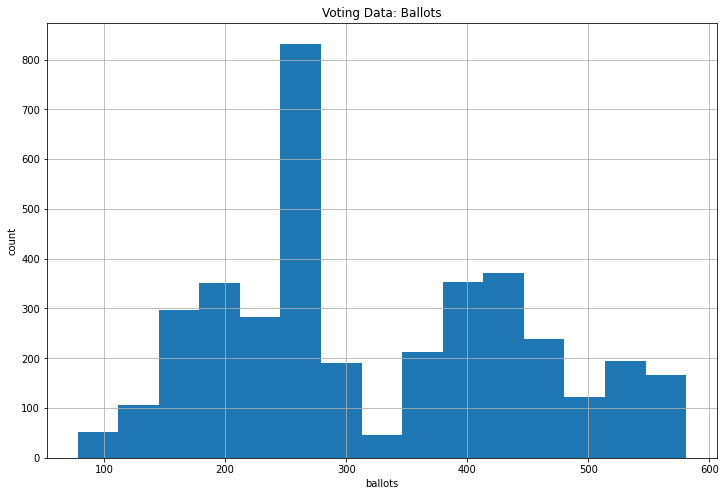

In [48]:
df_newHOF.hist(figsize=[12, 8], bins=15)
plt.title('Voting Data: Ballots')
plt.xlabel('ballots')
plt.ylabel('count')
plt.show()

# this code creates a histogram from the dataframe 'df_newbat' and name the title, xlabel, and ylabel with appropriate data identifications 

# The graph shows the number of ballots a player received to be designated a place in the Hall of Fame. 
# The average number of votes rested around 300 to 400, while the maximum number of ballots ever received was over almost 600. 
# This histogram is more evenly distributed than other histograms because the players listed in the dataframe are possible candidates for an honored recognition.


In [97]:
uploaded = files.upload()

# a code to import a file from the computer

Saving AwardsSharePlayers.csv to AwardsSharePlayers (1).csv


In [101]:
uploaded = files.upload()

# a code to import a file from the computer

Saving Salaries.csv to Salaries (2).csv


In [102]:
csvsal = pd.read_csv("Salaries.csv")
csvsal.head()

# Recall AwardsSharePLayers.csv into csv_share and display the first few lines of the dataframe. 

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [64]:
csv_share = pd.read_csv("AwardsSharePlayers.csv")
csv_share.head()

# Recall AwardsSharePLayers.csv into csv_share and display the first few lines of the dataframe. 

,awardID,yearID,lgID,playerID,pointsWon,pointsMax,votesFirst
0,Cy Young,1956,ML,fordwh01,1.0,16,1.0
1,Cy Young,1956,ML,maglisa01,4.0,16,4.0
2,Cy Young,1956,ML,newcodo01,10.0,16,10.0
3,Cy Young,1956,ML,spahnwa01,1.0,16,1.0
4,Cy Young,1957,ML,donovdi01,1.0,16,1.0


In [103]:
merged_data_awards = csvsal.merge(csvsal, on=["yearID", "playerID"])
merged_data_awards

,yearID,teamID_x,lgID_x,playerID,salary_x,teamID_y,lgID_y,salary_y
0,1985,ATL,NL,barkele01,870000,ATL,NL,870000
1,1985,ATL,NL,bedrost01,550000,ATL,NL,550000
2,1985,ATL,NL,benedbr01,545000,ATL,NL,545000
3,1985,ATL,NL,campri01,633333,ATL,NL,633333
4,1985,ATL,NL,ceronri01,625000,ATL,NL,625000
...,...,...,...,...,...,...,...,...
25778,2015,WAS,NL,treinbl01,512800,WAS,NL,512800
25779,2015,WAS,NL,ugglada01,507500,WAS,NL,507500
25780,2015,WAS,NL,werthja01,21000000,WAS,NL,21000000
25781,2015,WAS,NL,zimmejo02,16500000,WAS,NL,16500000


In [104]:
csv_share.describe() 

# the describe function is applied on the dataframe called 'csv_share' to call the column. 

,yearID,pointsWon,pointsMax,votesFirst
count,6795.000000,6795.000000,6795.000000,6437.000000
mean,1971.923032,43.347609,266.878440,1.617990
std,27.449771,67.958756,128.989358,4.888965
min,1911.000000,0.000000,16.000000,0.000000
25%,1950.000000,4.000000,140.000000,0.000000
50%,1974.000000,12.000000,336.000000,0.000000
75%,1995.000000,52.000000,336.000000,0.000000
max,2015.000000,448.000000,448.000000,32.000000


In [67]:
dfmerg_awards_share = merged_data_awards.query('yearID == 2007 and pointsWon > 30')

# The existing merged_data_award is filtered by the yearID and pointsWon to create a new dataframe called dfmerg_awards_share 
# yearID 2007 was chosen to compare the result with other results so far and 30 was chosen because it was a value in between 50% and 75% 

In [68]:
merged_final = merged_data_awards.merge(dfbat, on=['playerID', 'yearID'])
merged_final.head()

# The existing merged_data_awards is merged with csv_batting into merged_final on playerID and yearID
# The first few lines of merged_final is shown in the output 

,yearID,teamID_x,lgID_x,playerID,salary,awardID,lgID_y,pointsWon,pointsMax,votesFirst,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,ATL,NL,murphda05,1625000,MVP,NL,63.0,336,0.0,...,111.0,10.0,3.0,90.0,141.0,15.0,1.0,0.0,5.0,14.0
1,1985,BAL,AL,murraed02,1472819,MVP,AL,130.0,392,0.0,...,124.0,5.0,2.0,84.0,68.0,12.0,2.0,0.0,8.0,8.0
2,1985,BAL,AL,ripkeca01,800000,MVP,AL,9.0,392,0.0,...,110.0,2.0,3.0,67.0,68.0,1.0,1.0,0.0,8.0,32.0
3,1985,BOS,AL,boggswa01,1000000,MVP,AL,159.0,392,0.0,...,78.0,2.0,1.0,96.0,61.0,5.0,4.0,3.0,2.0,20.0
4,1985,BOS,AL,gedmari01,477500,MVP,AL,1.0,392,0.0,...,80.0,2.0,0.0,50.0,79.0,11.0,3.0,3.0,2.0,12.0


In [69]:
merged_final_flt = merged_final.query('yearID > 2006 and RBI > 79')

# The merged_final dataframe is filtered by yearID and RBI to create merged_final_flt

In [99]:
uploaded = files.upload()

# a code to import a file from the computer

Saving Fielding.csv to Fielding (1).csv


In [72]:
csv_fld = pd.read_csv("Fielding.csv")
csv_fld.head()

# Assign csv_fld to store the data from Fielding.csv and display the first few lines 

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,NaN,SS,1,NaN,NaN,1.0,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,NaN,NaN,67.0,72.0,42.0,5.0,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,NaN,NaN,8.0,14.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,NaN,NaN,1.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,NaN,NaN,51.0,3.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN


In [73]:
merged_data_fld = csvsal.merge(csv_fld, on=["playerID", "yearID"])
merged_data_fld

# csv_sal is merged with csv_fld to be stored into merged_data_fld on the intersection of playerID and yearID
# display the full dataframe in the output 

,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,POS,G,...,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,1985,ATL,NL,barkele01,870000,1,ATL,NL,P,20,...,221.0,2.0,9.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1985,ATL,NL,bedrost01,550000,1,ATL,NL,P,37,...,620.0,13.0,23.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN
2,1985,ATL,NL,benedbr01,545000,1,ATL,NL,C,70,...,1698.0,314.0,35.0,4.0,1.0,1.0,9.0,65.0,24.0,1.0
3,1985,ATL,NL,campri01,633333,1,ATL,NL,P,66,...,383.0,7.0,13.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN
4,1985,ATL,NL,ceronri01,625000,1,ATL,NL,C,91,...,2097.0,384.0,48.0,6.0,4.0,6.0,20.0,69.0,29.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51938,2015,WAS,NL,werthja01,21000000,1,WAS,NL,OF,86,...,NaN,113.0,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
51939,2015,WAS,NL,zimmejo02,16500000,1,WAS,NL,P,33,...,NaN,16.0,29.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
51940,2015,WAS,NL,zimmery01,14000000,1,WAS,NL,1B,93,...,NaN,726.0,49.0,4.0,63.0,NaN,NaN,NaN,NaN,NaN
51941,2015,WAS,NL,zimmery01,14000000,1,WAS,NL,LF,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
merged_data_fld["E2"] = pd.cut(merged_data_fld.E, bins=5, 
       labels=[5, 4, 3, 2, 1])

# pd.cut is applied to merged_data_fld to produce 5 bins with labels 5 to 1 in field rating order 
# the purpose of making bins is to group similar numbers of erros to be stored in the same bin so that a clearer relationship is shown in a visual representation 

In [75]:
merged_data_fld.head()

# display the first few lines of merged_data_fld 

,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,POS,G,...,PO,A,E,DP,PB,WP,SB,CS,ZR,E2
0,1985,ATL,NL,barkele01,870000,1,ATL,NL,P,20,...,2.0,9.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,5
1,1985,ATL,NL,bedrost01,550000,1,ATL,NL,P,37,...,13.0,23.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,5
2,1985,ATL,NL,benedbr01,545000,1,ATL,NL,C,70,...,314.0,35.0,4.0,1.0,1.0,9.0,65.0,24.0,1.0,5
3,1985,ATL,NL,campri01,633333,1,ATL,NL,P,66,...,7.0,13.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,5
4,1985,ATL,NL,ceronri01,625000,1,ATL,NL,C,91,...,384.0,48.0,6.0,4.0,6.0,20.0,69.0,29.0,1.0,5


In [76]:
csv_fld.describe() 

# list csv_fld 

,yearID,stint,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
count,170526.000000,170526.000000,170526.000000,75849.000000,102313.000000,156409.000000,156408.000000,156407.000000,156408.000000,11116.000000,4189.000000,6024.000000,6024.000000,4189.000000
mean,1966.517123,1.077818,33.651854,26.930823,708.231134,79.463496,30.826198,3.512093,6.349017,5.167326,11.772977,24.909031,12.066899,0.703032
std,38.550401,0.283581,41.117359,40.790139,1061.423810,176.463601,75.011893,7.534450,18.388112,9.116445,12.249974,25.816811,13.222888,1.394882
min,1871.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1941.000000,1.000000,4.000000,1.000000,54.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,0.000000
50%,1977.000000,1.000000,16.000000,7.000000,220.000000,10.000000,5.000000,1.000000,1.000000,2.000000,8.000000,17.000000,8.000000,0.000000
75%,1998.000000,1.000000,45.000000,32.000000,754.000000,72.000000,22.000000,3.000000,3.000000,6.000000,19.000000,39.000000,19.000000,1.000000
max,2015.000000,5.000000,165.000000,164.000000,4469.000000,1846.000000,641.000000,119.000000,194.000000,105.000000,69.000000,155.000000,89.000000,15.000000


In [77]:
dfmerg_fld = merged_data_fld 

# recall merge_data_fld and store into dfmerg_fld 
# apply no conditions because the dataframe shows a clear relationship though there are several plots 

In [78]:
merged_final_2 = merged_data_fld.merge(csv_share, on=['playerID', 'yearID'])
merged_final_2.head()

# merged_data_fld is merged with csv_share on the intersection of playerID and yearID to display the first few lines of the dataframe 

,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,POS,G,...,WP,SB,CS,ZR,E2,awardID,lgID,pointsWon,pointsMax,votesFirst
0,1985,ATL,NL,murphda05,1625000,1,ATL,NL,CF,161,...,NaN,NaN,NaN,NaN,5,MVP,NL,63.0,336,0.0
1,1985,ATL,NL,murphda05,1625000,1,ATL,NL,OF,161,...,NaN,NaN,NaN,NaN,5,MVP,NL,63.0,336,0.0
2,1985,BAL,AL,murraed02,1472819,1,BAL,AL,1B,154,...,NaN,NaN,NaN,NaN,3,MVP,AL,130.0,392,0.0
3,1985,BAL,AL,murraed02,1472819,1,BAL,AL,DH,2,...,NaN,NaN,NaN,NaN,NaN,MVP,AL,130.0,392,0.0
4,1985,BAL,AL,ripkeca01,800000,1,BAL,AL,SS,161,...,NaN,NaN,NaN,NaN,2,MVP,AL,9.0,392,0.0


In [79]:
merged_final_2_flt = merged_final_2.query('yearID > 2010 and pointsWon > 30')

# recall merged_final_2 and filter it by yearID and pointsWon and store this data into merged_final_2_flt 
# yearID 2007 was chosen to compare the result with other results and 30 was chosen because it was a value between 50% and 75% 

In [81]:
csv_G = pd.read_csv("Batting.csv")
csv_G.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [82]:
csv_G.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,101332.000000,101332.000000,101332.000000,96183.000000,96183.000000,96183.000000,96183.000000,96183.000000,96183.000000,95759.000000,94883.000000,72729.000000,96183.000000,88345.000000,59620.000000,93373.000000,89845.000000,60151.000000,70075.000000
mean,1963.506533,1.077567,51.400111,149.970327,19.887038,39.261647,6.637067,1.373361,2.949305,17.965163,3.158184,1.324025,13.811484,21.629849,1.213234,1.113395,2.457900,1.150122,3.210032
std,38.628278,0.283676,47.145273,186.557072,28.671365,53.310941,9.801563,2.710547,6.409662,26.756514,7.922994,2.838196,21.092775,28.432978,2.894918,2.320660,4.347818,2.023981,4.835881
min,1871.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1933.000000,1.000000,13.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1972.000000,1.000000,34.000000,57.000000,5.000000,11.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000,10.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1997.000000,1.000000,80.250000,251.000000,30.000000,63.000000,10.000000,2.000000,3.000000,27.000000,2.000000,1.000000,20.000000,30.000000,1.000000,1.000000,3.000000,2.000000,5.000000
max,2015.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [83]:
merged_data_G = csvsal.merge(csv_G, on=["playerID", "yearID"])
merged_data_G

,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,ATL,NL,barkele01,870000,1,ATL,NL,20,17.0,...,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
1,1985,ATL,NL,bedrost01,550000,1,ATL,NL,37,64.0,...,1.0,0.0,0.0,1.0,22.0,0.0,0.0,6.0,0.0,0.0
2,1985,ATL,NL,benedbr01,545000,1,ATL,NL,70,208.0,...,20.0,0.0,1.0,22.0,12.0,1.0,1.0,4.0,2.0,8.0
3,1985,ATL,NL,campri01,633333,1,ATL,NL,66,13.0,...,2.0,0.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0
4,1985,ATL,NL,ceronri01,625000,1,ATL,NL,96,282.0,...,25.0,0.0,3.0,29.0,25.0,1.0,1.0,0.0,4.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27380,2015,WAS,NL,treinbl01,512800,1,WAS,NL,60,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
27381,2015,WAS,NL,ugglada01,507500,1,WAS,NL,67,120.0,...,16.0,0.0,1.0,19.0,40.0,0.0,1.0,0.0,1.0,3.0
27382,2015,WAS,NL,werthja01,21000000,1,WAS,NL,88,331.0,...,42.0,0.0,1.0,38.0,84.0,0.0,3.0,0.0,6.0,8.0
27383,2015,WAS,NL,zimmejo02,16500000,1,WAS,NL,33,63.0,...,3.0,0.0,0.0,0.0,18.0,0.0,0.0,6.0,0.0,0.0


In [84]:
merged_data_G["E3"] = pd.cut(merged_data_G.G, bins=10, 
       labels=[10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

In [85]:
merged_data_G.head()

,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,G,AB,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,E3
0,1985,ATL,NL,barkele01,870000,1,ATL,NL,20,17.0,...,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,9
1,1985,ATL,NL,bedrost01,550000,1,ATL,NL,37,64.0,...,0.0,0.0,1.0,22.0,0.0,0.0,6.0,0.0,0.0,8
2,1985,ATL,NL,benedbr01,545000,1,ATL,NL,70,208.0,...,0.0,1.0,22.0,12.0,1.0,1.0,4.0,2.0,8.0,6
3,1985,ATL,NL,campri01,633333,1,ATL,NL,66,13.0,...,0.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,6
4,1985,ATL,NL,ceronri01,625000,1,ATL,NL,96,282.0,...,0.0,3.0,29.0,25.0,1.0,1.0,0.0,4.0,15.0,5


In [86]:
dfmerg_G = merged_data_G 

In [87]:
merged_final_3 = dfmerg_G.merge(csv_share, on=['playerID', 'yearID'])
merged_final_3.head()

,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,G,AB,...,HBP,SH,SF,GIDP,E3,awardID,lgID,pointsWon,pointsMax,votesFirst
0,1985,ATL,NL,murphda05,1625000,1,ATL,NL,162,616.0,...,1.0,0.0,5.0,14.0,1,MVP,NL,63.0,336,0.0
1,1985,BAL,AL,murraed02,1472819,1,BAL,AL,156,583.0,...,2.0,0.0,8.0,8.0,1,MVP,AL,130.0,392,0.0
2,1985,BAL,AL,ripkeca01,800000,1,BAL,AL,161,642.0,...,1.0,0.0,8.0,32.0,1,MVP,AL,9.0,392,0.0
3,1985,BOS,AL,boggswa01,1000000,1,BOS,AL,161,653.0,...,4.0,3.0,2.0,20.0,1,MVP,AL,159.0,392,0.0
4,1985,BOS,AL,gedmari01,477500,1,BOS,AL,144,498.0,...,3.0,3.0,2.0,12.0,2,MVP,AL,1.0,392,0.0
